Real Signal FFT：
[-0.+0.j -0.+0.j  0.-0.j -0.-8.j  0.+0.j  0.+0.j -0.-4.j  0.+0.j -0.+0.j
  0.-0.j -0.+4.j  0.-0.j  0.+0.j -0.+8.j  0.+0.j  0.-0.j]

Complex Signal FFT：
[ 5.55+4.7j  -1.42-1.79j -0.46-0.89j -0.18-8.64j -0.04-0.5j   0.05-0.42j
  0.12-0.36j  0.17-0.31j  0.22-0.26j  0.27-0.21j  0.32-0.17j  0.38-0.11j
  0.46-0.04j  0.57+8.07j  0.76+0.24j  1.24+0.69j]

Real Signal RFFT：
[-0.+0.j -0.+0.j  0.-0.j -0.-8.j  0.+0.j  0.+0.j -0.-4.j  0.+0.j -0.+0.j]


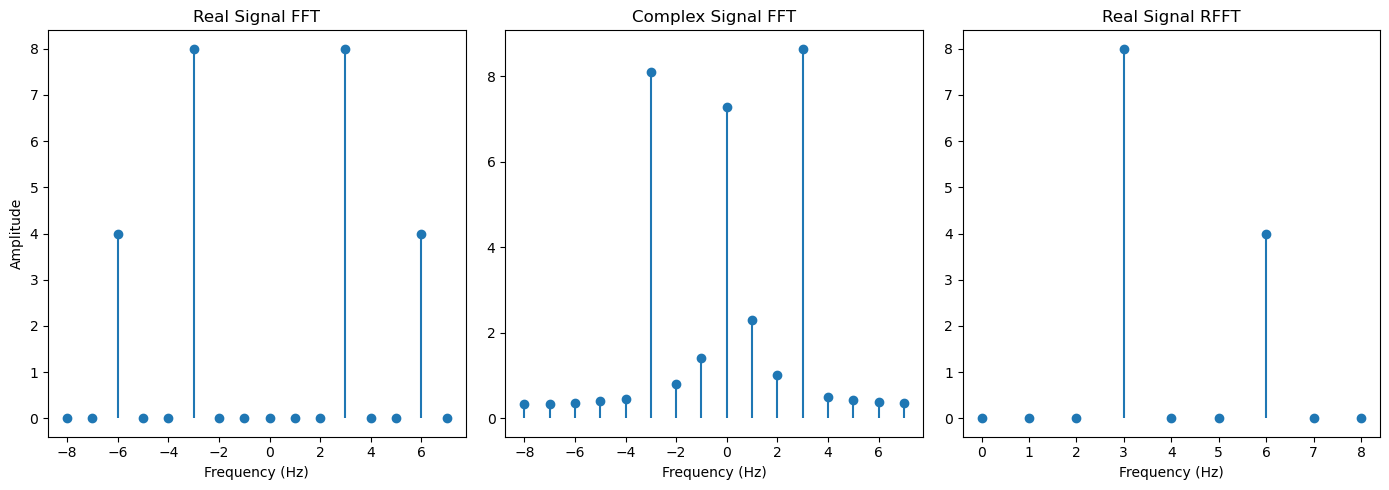

In [1]:
import numpy as np
import matplotlib.pyplot as plt

fs = 16
nSample = 16
t = np.arange(nSample) / fs

# 构造实信号：两个不同频率的正弦波
x_real = np.sin(2*np.pi*3*t) + 0.5*np.sin(2*np.pi*6*t)

# 构造复信号：正弦波 + 一个复指数
x_complex = np.sin(2*np.pi*3*t) + 0.5*np.exp(1j*0.3*5*t)

# FFT
X_real_fft = np.fft.fft(x_real)
X_complex_fft = np.fft.fft(x_complex)

# RFFT 只适用于实信号
X_real_rfft = np.fft.rfft(x_real)
freq_full = np.fft.fftfreq(nSample, d=1/fs)  # 长度为nSample
freq_half = np.fft.rfftfreq(nSample, d=1/fs)  # 长度为nSample//2+1

print("Real Signal FFT：")
print(np.round(X_real_fft, 2))  # 保留两位小数
print("\nComplex Signal FFT：")
print(np.round(X_complex_fft, 2))
print("\nReal Signal RFFT：")
print(np.round(X_real_rfft, 2))

# 可视化幅度谱
plt.figure(figsize=(14,5))

plt.subplot(1,3,1)
plt.stem(freq_full, np.abs(X_real_fft), basefmt=" ")
plt.title("Real Signal FFT")
plt.xlabel("Frequency (Hz)"); plt.ylabel("Amplitude")

plt.subplot(1,3,2)
plt.stem(freq_full, np.abs(X_complex_fft), basefmt=" ")
plt.title("Complex Signal FFT")
plt.xlabel("Frequency (Hz)")

plt.subplot(1,3,3)
plt.stem(freq_half, np.abs(X_real_rfft), basefmt=" ")
plt.title("Real Signal RFFT")
plt.xlabel("Frequency (Hz)")

plt.tight_layout()
plt.show()
